# Model Expiramentation

In [1]:
from lazypredict.Supervised import LazyClassifier
import hyperopt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('data/ACME-HappinessSurvey2020.csv')

df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [3]:
target_variable = df['Y']
X = df.drop(columns=['Y'], axis=1)

X.head()

,X1,X2,X3,X4,X5,X6
0,3,3,3,4,2,4
1,3,2,3,5,4,3
2,5,3,3,3,3,5
3,5,4,3,3,3,5
4,5,4,3,3,3,5


In [4]:
import random

seed = random.randint(1000, 9999)
print(seed)

X_train, X_test, y_train, y_test = train_test_split(X, target_variable, test_size=.20, random_state=seed)

model = LazyClassifier(verbose=0, ignore_warnings=True, random_state=seed, custom_metric=None)

models, preds = model.fit(X_train, X_test, y_train, y_test)
models

6302


  0%|          | 0/31 [00:00<?, ?it/s]

100%|██████████| 31/31 [00:00<00:00, 46.64it/s]

[LightGBM] [Info] Number of positive: 55, number of negative: 45
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.550000 -> initscore=0.200671
[LightGBM] [Info] Start training from score 0.200671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
CalibratedClassifierCV,0.65,0.64,0.64,0.63,0.03
SGDClassifier,0.62,0.63,0.63,0.60,0.01
LinearSVC,0.62,0.62,0.62,0.62,0.01
BernoulliNB,0.62,0.62,0.62,0.62,0.01
LGBMClassifier,0.62,0.61,0.61,0.62,0.08
XGBClassifier,0.62,0.61,0.61,0.61,0.15
ExtraTreeClassifier,0.62,0.61,0.61,0.61,0.01
BaggingClassifier,0.62,0.60,0.60,0.60,0.02
RidgeClassifierCV,0.58,0.58,0.58,0.58,0.01


In [5]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

print(f'Shape of training dataset:\n\t{X_train.shape, y_train.shape}')
print(f'Shape of testing dataset:\n\t{X_test.shape, y_test.shape}')

models_dict = {
    'Logistic Regression': LogisticRegression(random_state=seed),
    # 'Bernoulli Naive-Bayes': BernoulliNB(),
    'SVC': SVC(random_state=seed),
    'LinearSVC': LinearSVC(random_state=seed),
    'XGBoost': XGBClassifier(),
    'KNeighbors Classifer': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=seed)
}

Shape of training dataset:
	((100, 6), (100,))
Shape of testing dataset:
	((26, 6), (26,))


In [6]:

for name, model in models_dict.items():
    print(f"{'*'*30} {name} {'*'*30}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f'Training score: {train_score}')
    print(f'Testing score: {test_score}')
    # print(f'Cross validation scores: {cross_val_score(model, X_train, y_train)}')
    print(f"Classification report:\n{classification_report(y_test, y_pred)}")
    # print(confusion_matrix(y_test, y_pred))
    print()

****************************** Logistic Regression ******************************
Training score: 0.61
Testing score: 0.5384615384615384
Classification report:
              precision    recall  f1-score   support

           0       0.50      0.58      0.54        12
           1       0.58      0.50      0.54        14

    accuracy                           0.54        26
   macro avg       0.54      0.54      0.54        26
weighted avg       0.54      0.54      0.54        26


****************************** SVC ******************************
Training score: 0.76
Testing score: 0.5
Classification report:
              precision    recall  f1-score   support

           0       0.45      0.42      0.43        12
           1       0.53      0.57      0.55        14

    accuracy                           0.50        26
   macro avg       0.49      0.49      0.49        26
weighted avg       0.50      0.50      0.50        26


****************************** LinearSVC **************

## Hyperparameter Tuning

In [7]:
## HELPER FUNCTIONS FOR RANDOMIZED and EXHAUSTIVE GRID SEARCH and ROC PLOTTING

def random_search(estimator, params, X_train, y_train, X_test, y_test, random_state, cv=5, n_jobs=-1):
    estimator.random_state = random_state
    model_cv = RandomizedSearchCV(estimator=estimator, param_distributions=params, cv=cv, n_jobs=n_jobs, random_state=random_state)
    model_cv.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Randomized Search')
    print('Best parameters: {}'.format(model_cv.best_params_))
    print('Best score: {}'.format(model_cv.best_score_))
    print('Training Score: {}'.format(model_cv.score(X_train, y_train)))
    print('Test score: {}'.format(model_cv.score(X_test, y_test)))
    print(f"Classification report:\n{classification_report(y_test, y_pred)}")


def grid_search(estimator, params, X_train, y_train, X_test, y_test, random_state, n_jobs=-1, cv=5):
    estimator.random_state = random_state
    model_grid_search = GridSearchCV(estimator=estimator, param_grid=params, n_jobs=n_jobs, cv=cv)
    model_grid_search.fit(X_train, y_train)
    y_pred = model_grid_search.predict(X_test)
    print('Grid Search')
    print('Best params: {}'.format(model_grid_search.best_params_))
    print('Best score: {}'.format(model_grid_search.best_score_))
    print('Training score: {}'.format(model_grid_search.score(X_train, y_train)))
    print('Test score: {}'.format(model_grid_search.score(X_test, y_test)))
    print(f"Classification report:\n{classification_report(y_test, y_pred)}")

def roc(y_proba, y_test):
    roc_score = roc_auc_score(y_test, y_proba)
    # print(roc_score)

    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    x = np.linspace(0,1,100)
    y=x

    plt.plot(fpr, tpr, label='ROC Score: {}'.format(round(roc_score, 7)))
    plt.plot(x,y, '--', label='As Good As Chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.title('True Positive Rate vs. False Positive Rate')
    plt.show()

In [8]:
#### Dictionary that will have the trained models as values

trained_models_dict = {}

### Linear SVC

In [9]:
svc_gauss_seed = 1882

X_train_gauss_svc, X_test_gauss_svc, y_train_gauss_svc, y_test_gauss_svc = train_test_split(X, target_variable, random_state=svc_gauss_seed, test_size=.20)
# print(X_train.shape, y_train.shape)

params = {
    'C': np.arange(1,1000,10)
    # 'C': np.logspace(-2.3, -1.3, 10)
}

random_search(estimator=models_dict['LinearSVC'], params=params, X_train=X_train_gauss_svc, y_train=y_train_gauss_svc, X_test=X_test_gauss_svc, y_test=y_test_gauss_svc, random_state=svc_gauss_seed)
grid_search(estimator=models_dict['LinearSVC'], params=params, X_train=X_train_gauss_svc, y_train=y_train_gauss_svc, X_test=X_test_gauss_svc, y_test=y_test_gauss_svc, random_state=svc_gauss_seed)

Randomized Search
Best parameters: {'C': np.int64(491)}
Best score: 0.53
Training Score: 0.54
Test score: 0.8076923076923077
Classification report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.88      0.88      0.88        16

    accuracy                           0.85        26
   macro avg       0.84      0.84      0.84        26
weighted avg       0.85      0.85      0.85        26

Grid Search
Best params: {'C': np.int64(11)}
Best score: 0.53
Training score: 0.54
Test score: 0.7692307692307693
Classification report:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.81      0.81      0.81        16

    accuracy                           0.77        26
   macro avg       0.76      0.76      0.76        26
weighted avg       0.77      0.77      0.77        26



In [10]:
linear_svc_model = LinearSVC(C=491, random_state=svc_gauss_seed)

linear_svc_model.fit(X_train_gauss_svc, y_train_gauss_svc)
y_pred = linear_svc_model.predict(X_test_gauss_svc)

print(f'Classification report:\n{classification_report(y_test_gauss_svc, y_pred)}')

trained_models_dict['Linear SVC'] = linear_svc_model

Classification report:
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.87      0.81      0.84        16

    accuracy                           0.81        26
   macro avg       0.80      0.81      0.80        26
weighted avg       0.81      0.81      0.81        26



### Gaussian Naive-Bayes

In [11]:
gauss_nb = GaussianNB()

gauss_nb.fit(X_train_gauss_svc, y_train_gauss_svc)
y_pred = gauss_nb.predict(X_test_gauss_svc)

gauss_probs = gauss_nb.predict_proba(X_test_gauss_svc)
gauss_probs = gauss_probs[:, 1]

print(classification_report(y_test_gauss_svc, y_pred))

trained_models_dict['gauss_nb'] = gauss_nb

              precision    recall  f1-score   support

           0       0.62      0.80      0.70        10
           1       0.85      0.69      0.76        16

    accuracy                           0.73        26
   macro avg       0.73      0.74      0.73        26
weighted avg       0.76      0.73      0.73        26



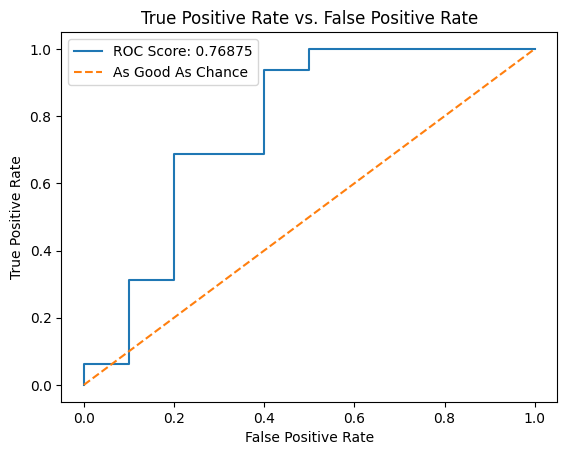

In [12]:
roc(y_proba=gauss_probs, y_test=y_test_gauss_svc)

### XGBoost

In [13]:
xgboost_seed = 1181

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, target_variable, test_size=.20, random_state=xgboost_seed)

params = {
    'booster': ['gbtree', 'gblinear', 'dart']
}

random_search(estimator=models_dict['XGBoost'], params=params, X_train=X_train_xgb, y_train=y_train_xgb, X_test=X_test_xgb, y_test=y_test_xgb, random_state=xgboost_seed)
grid_search(estimator=models_dict['XGBoost'], params=params, X_train=X_train_xgb, y_train=y_train_xgb, X_test=X_test_xgb, y_test=y_test_xgb, random_state=xgboost_seed)

Randomized Search
Best parameters: {'booster': 'gblinear'}
Best score: 0.54
Training Score: 0.62
Test score: 0.6153846153846154
Classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.94      0.97        16

    accuracy                           0.96        26
   macro avg       0.95      0.97      0.96        26
weighted avg       0.97      0.96      0.96        26

Grid Search
Best params: {'booster': 'gblinear'}
Best score: 0.54
Training score: 0.62
Test score: 0.6153846153846154
Classification report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        10
           1       0.69      0.69      0.69        16

    accuracy                           0.62        26
   macro avg       0.59      0.59      0.59        26
weighted avg       0.62      0.62      0.62        26



In [14]:
params = {            ######### if the above grid searchs gave a 'booster' == 'gbtree' ############
    # 'booster': ['gbtree'],
    # 'eta': np.arange(0,1,.01),
    # 'gamma': np.arange(0,1000, 250),
    # 'max_depth': [6,8,10],
    # 'subsample': [.5]
}

params = {
    'booster': ['gblinear'],
    'reg_lambda': np.arange(.0001, 100, 10),
    'reg_alpha': np.arange(.0001, 100, 10) 
}

random_search(estimator=models_dict['XGBoost'], params=params, X_train=X_train_xgb, y_train=y_train_xgb, X_test=X_test_xgb, y_test=y_test_xgb, random_state=xgboost_seed)
grid_search(estimator=models_dict['XGBoost'], params=params, X_train=X_train_xgb, y_train=y_train_xgb, X_test=X_test_xgb, y_test=y_test_xgb, random_state=xgboost_seed)

Randomized Search
Best parameters: {'reg_lambda': np.float64(60.0001), 'reg_alpha': np.float64(90.0001), 'booster': 'gblinear'}
Best score: 0.53
Training Score: 0.53
Test score: 0.6153846153846154
Classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.94      0.97        16

    accuracy                           0.96        26
   macro avg       0.95      0.97      0.96        26
weighted avg       0.97      0.96      0.96        26

Grid Search
Best params: {'booster': 'gblinear', 'reg_alpha': np.float64(0.0001), 'reg_lambda': np.float64(0.0001)}
Best score: 0.54
Training score: 0.62
Test score: 0.6153846153846154
Classification report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        10
           1       0.69      0.69      0.69        16

    accuracy                           0.62        26
   macro avg       0.59    

In [15]:
xgboost_model = XGBClassifier(booster='gblinear', reg_lambda=60.0001, reg_alpha=90.0001, random_state=xgboost_seed)
xgboost_model.fit(X_train_xgb, y_train_xgb)
y_pred = xgboost_model.predict(X_test_xgb)
xgboost_probs = xgboost_model.predict_proba(X_test_xgb)
xgboost_probs = xgboost_probs[:,1]

# print(xgboost_model.score(X_train_xgb, y_train_xgb))
# print(xgboost_model.score(X_test_xgb, y_test_xgb))
print(f"Classification report:\n{classification_report(y_test_xgb, y_pred)}")

trained_models_dict['XGBoost'] = xgboost_model

Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.62      1.00      0.76        16

    accuracy                           0.62        26
   macro avg       0.31      0.50      0.38        26
weighted avg       0.38      0.62      0.47        26



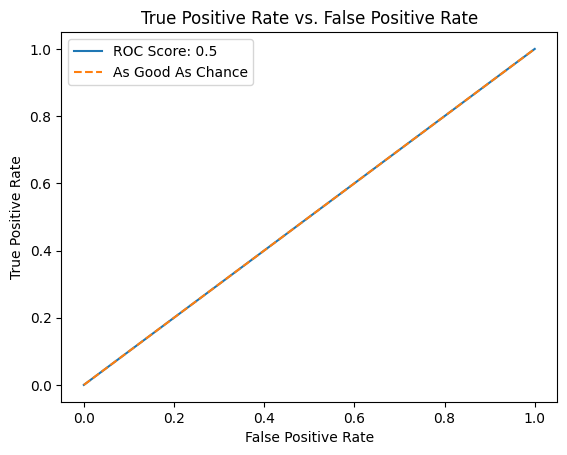

In [16]:
roc(y_proba=xgboost_probs, y_test=y_test_xgb)

### Random Forest

In [17]:
rf_seed = 4501

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, target_variable, random_state=rf_seed, test_size=.20)

params = {
    'n_estimators': np.arange(1,100,10),
    'max_features': ['sqrt'],
    'max_depth': [4,6,8],
    'min_samples_split': [2]
}

random_search(estimator=models_dict['Random Forest'], params=params, X_train=X_train_rf, y_train=y_train_rf, X_test=X_test_rf, y_test=y_test_rf, random_state=rf_seed)
grid_search(estimator=models_dict['Random Forest'], params=params, X_train=X_train_rf, y_train=y_train_rf, X_test=X_test_rf, y_test=y_test_rf, random_state=rf_seed)

Randomized Search
Best parameters: {'n_estimators': np.int64(1), 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 6}
Best score: 0.6
Training Score: 0.7
Test score: 0.5769230769230769
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.93      0.93      0.93        14

    accuracy                           0.92        26
   macro avg       0.92      0.92      0.92        26
weighted avg       0.92      0.92      0.92        26

Grid Search
Best params: {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': np.int64(1)}
Best score: 0.6
Training score: 0.7
Test score: 0.5769230769230769
Classification report:
              precision    recall  f1-score   support

           0       0.53      0.67      0.59        12
           1       0.64      0.50      0.56        14

    accuracy                           0.58        26
   macro avg       0.58    

In [18]:
rf_model = RandomForestClassifier(max_depth=6, max_features='sqrt', min_samples_split=2, n_estimators=1, random_state=rf_seed)

rf_model.fit(X_train_rf, y_train_rf)

y_preds = rf_model.predict(X_test_rf)
y_proba = rf_model.predict_proba(X_test_rf)

y_proba = y_proba[:, 1]

print(classification_report(y_test_rf, y_preds))

trained_models_dict['Random Forest'] = rf_model

              precision    recall  f1-score   support

           0       0.53      0.67      0.59        12
           1       0.64      0.50      0.56        14

    accuracy                           0.58        26
   macro avg       0.58      0.58      0.58        26
weighted avg       0.59      0.58      0.58        26



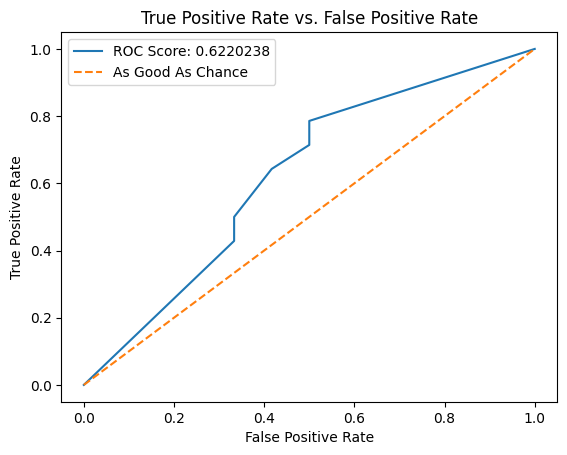

In [19]:
roc(y_proba=y_proba, y_test=y_test_rf)

## Voting Classifier

In [20]:

estimators = [
    ('gauss_nb', trained_models_dict['gauss_nb']),
    ('lsvc', trained_models_dict['Linear SVC']),
    ('xgboost', trained_models_dict['XGBoost']),
    ('rf', trained_models_dict['Random Forest'])
]


hard_vote = VotingClassifier(estimators=[estimators[0], estimators[2]], voting='hard', n_jobs=-1)
soft_vote = VotingClassifier(estimators=[estimators[0], estimators[2]], voting='soft', n_jobs=-1)

hard_vote.fit(X_train, y_train)
soft_vote.fit(X_train, y_train)

preds = hard_vote.predict(X_test)
preds_soft = soft_vote.predict(X_test)

print(f"{'*'*30} Hard voting: {'*'*30}")
print(classification_report(y_test, preds))

print(f"{'*'*30} Soft voting: {'*'*30}")
print(classification_report(y_test, preds_soft))

****************************** Hard voting: ******************************
              precision    recall  f1-score   support

           0       0.50      0.58      0.54        12
           1       0.58      0.50      0.54        14

    accuracy                           0.54        26
   macro avg       0.54      0.54      0.54        26
weighted avg       0.54      0.54      0.54        26

****************************** Soft voting: ******************************
              precision    recall  f1-score   support

           0       0.46      0.50      0.48        12
           1       0.54      0.50      0.52        14

    accuracy                           0.50        26
   macro avg       0.50      0.50      0.50        26
weighted avg       0.50      0.50      0.50        26



## Stacking Classifier

In [21]:
from sklearn.ensemble import StackingClassifier

# stack_methods = ['predict', 'decision_function']

# for methods in stack_methods:
stacking_class = StackingClassifier(estimators=estimators, stack_method='predict', n_jobs=-1)

stacking_class.fit(X_train, y_train)

preds = stacking_class.predict(X_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.57      0.67      0.62        12
           1       0.67      0.57      0.62        14

    accuracy                           0.62        26
   macro avg       0.62      0.62      0.62        26
weighted avg       0.62      0.62      0.62        26



## Bagging Classifier

In [22]:
# for name, model in trained_models_dict.items():
#     print(f"{'*'*10} {name} {'*'*10}")
#     model_ = BaggingClassifier(estimator=model, random_state=seed, n_jobs=-1)
#     model_.fit(X_train, y_train)
#     y_pred = model_.predict(X_test)

#     print(model_.score(X_train, y_train))
#     print(model_.score(X_test, y_test))
#     print(f"Classification report:\n{classification_report(y_test, y_pred)}")
#     print(confusion_matrix(y_test, y_pred))
#     print()

## Hyperopt

In [23]:
####### just like the dictionary trained_models_dict above, this dictionary will store the hyperopt trained models

hyperopt_trained_models = {}

In [24]:
from hpsklearn import HyperoptEstimator, any_classifier, any_preprocessing
from hyperopt import hp, Trials, fmin, STATUS_OK

space = {
    'n_estimators': hp.choice('n_estimators', np.arange(1,100,10)),
    'max_features': hp.choice('max_features', ['sqrt']),
    'max_depth': hp.choice('max_depth', [6,8,10]),
    'min_samples_split': hp.choice('min_smaples_split', [2])
}

def hyperparameter_tuning(space):
    model = RandomForestClassifier(n_estimators=space['n_estimators'], max_features=space['max_features'], max_depth=space['max_depth'], min_samples_split=space['min_samples_split'], random_state=rf_seed)
    # evaluation = [(X_train_gauss, y_train_gauss), (X_test_gauss, y_test_gauss)]

    model.fit(X_train_rf, y_train_rf)
    y_pred = model.predict(X_test_rf)
    acc = model.score(X_test_rf, y_test_rf)   
    print(acc)

    print(classification_report(y_test_rf, y_pred))

    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()

best = fmin(fn=hyperparameter_tuning, space=space, algo=hyperopt.tpe.suggest, trials=trials, max_evals=100)

print(best)

0.7692307692307693                                     
              precision    recall  f1-score   support  

           0       0.75      0.75      0.75        12
           1       0.79      0.79      0.79        14

    accuracy                           0.77        26
   macro avg       0.77      0.77      0.77        26
weighted avg       0.77      0.77      0.77        26

0.5769230769230769                                     
              precision    recall  f1-score   support                             

           0       0.53      0.67      0.59        12
           1       0.64      0.50      0.56        14

    accuracy                           0.58        26
   macro avg       0.58      0.58      0.58        26
weighted avg       0.59      0.58      0.58        26

0.5769230769230769                                                                
              precision    recall  f1-score   support                             

           0       0.55      0.50   

In [25]:
rf_model = RandomForestClassifier(max_depth=8, max_features='sqrt', min_samples_split=2, n_estimators=40, random_state=rf_seed)
rf_model.fit(X_train_rf, y_train_rf)
y_preds = rf_model.predict(X_test_rf)

y_proba = rf_model.predict_proba(X_test_rf)[:,1]

print(classification_report(y_test_rf, y_preds))

hyperopt_trained_models['Random Forest'] = rf_model

              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.73      0.79      0.76        14

    accuracy                           0.73        26
   macro avg       0.73      0.73      0.73        26
weighted avg       0.73      0.73      0.73        26



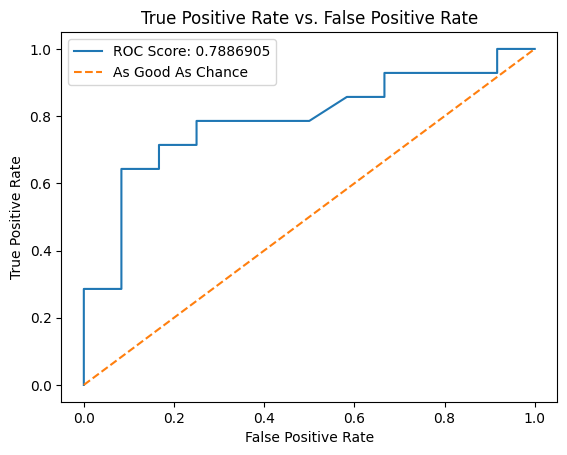

In [26]:
roc(y_proba=y_proba, y_test=y_test_rf)

In [27]:
space = {
    # 'booster': hp.choice('booster', ['gbtree']),
    # 'eta': hp.choice('eta', np.arange(0,1,.01)),
    # 'gamma': hp.choice('gamma', np.arange(1,1000,250)),
    # 'max_depth': hp.choice('max_depth', [6,8,10]),
    # 'subsample': hp.choice('subsample', [.5])
}

space = {
    'booster': hp.choice('booster', ['gblinear']),
    'reg_lambda': hp.choice('reg_lambda', np.arange(.0001, 100, 10)),
    'reg_alpha': hp.choice('reg_alpha', np.arange(.0001, 100, 10))
}

def hyperparameter_tuning(space):
    model = XGBClassifier(booster=space['booster'], reg_lambda=space['reg_lambda'], reg_alpha=space['reg_alpha'], random_state=xgboost_seed)
    # evaluation = [(X_train_gauss, y_train_gauss), (X_test_gauss, y_test_gauss)]

    model.fit(X_train_gauss_svc, y_train_gauss_svc)
    y_pred = model.predict(X_test_gauss_svc)
    acc = model.score(X_test_gauss_svc, y_test_gauss_svc)   
    print(acc)

    print(classification_report(y_test_gauss_svc, y_pred))

    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()

best = fmin(fn=hyperparameter_tuning, space=space, algo=hyperopt.tpe.suggest, trials=trials, max_evals=100)

print(best)

0.6153846153846154                                     
              precision    recall  f1-score   support  

           0       0.00      0.00      0.00        10
           1       0.62      1.00      0.76        16

    accuracy                           0.62        26
   macro avg       0.31      0.50      0.38        26
weighted avg       0.38      0.62      0.47        26

0.6153846153846154                                     
              precision    recall  f1-score   support                             

           0       0.00      0.00      0.00        10
           1       0.62      1.00      0.76        16

    accuracy                           0.62        26
   macro avg       0.31      0.50      0.38        26
weighted avg       0.38      0.62      0.47        26

0.6153846153846154                                                                
              precision    recall  f1-score   support                             

           0       0.00      0.00   

In [28]:
xgboost = XGBClassifier(booster='gblinear', reg_lambda=.01, reg_alpha=100, random_state=xgboost_seed)
xgboost.fit(X_train_xgb, y_train_xgb)
y_pred = xgboost.predict(X_test_xgb)
y_proba = xgboost.predict_proba(X_test_xgb)
y_proba = y_proba[:,1]

print(classification_report(y_test_xgb, y_pred))

hyperopt_trained_models['XGBoost'] = xgboost

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.62      1.00      0.76        16

    accuracy                           0.62        26
   macro avg       0.31      0.50      0.38        26
weighted avg       0.38      0.62      0.47        26



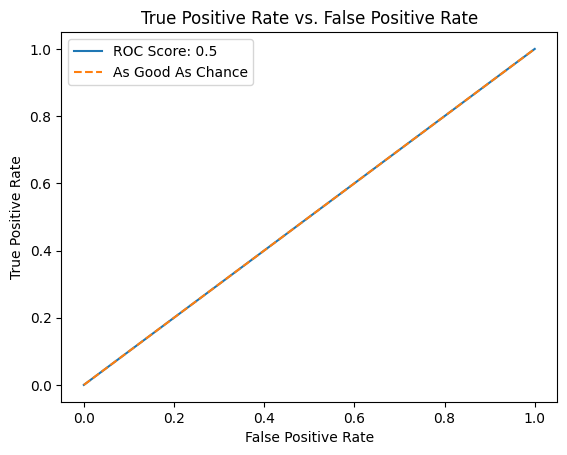

In [29]:
roc(y_proba=y_proba , y_test=y_test_xgb)

As of now, the models that are performing the best are the hyperparameter-tuned LinearSVC and GaussianNB models as well as the Hyperopt trained Random Forest Model. Although the LinearSVC model does not have a ROC Score attached to it the classification of both negative and positive classes are fairly strong (both ~ 80%).
* Below we will explore which features are needed with these three models

## Feature Selection

In [30]:
from sklearn.feature_selection import RFE, RFECV

for i in range(1,X.shape[1]+1):
    print(f"{'*'*20} {i} feature(s) used {'*'*20}")
    selector = RFE(estimator=rf_model, n_features_to_select=i, step=1)
    selector.fit(X_train_rf, y_train_rf)
    y_pred = selector.predict(X_test_rf)
    print(classification_report(y_test, y_pred))
    # print(selector.ranking_)



******************** 1 feature(s) used ********************
              precision    recall  f1-score   support

           0       0.71      0.42      0.53        12
           1       0.63      0.86      0.73        14

    accuracy                           0.65        26
   macro avg       0.67      0.64      0.63        26
weighted avg       0.67      0.65      0.63        26

******************** 2 feature(s) used ********************
              precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       0.71      0.86      0.77        14

    accuracy                           0.73        26
   macro avg       0.74      0.72      0.72        26
weighted avg       0.74      0.73      0.72        26

******************** 3 feature(s) used ********************
              precision    recall  f1-score   support

           0       0.46      0.50      0.48        12
           1       0.54      0.50      0.52        14

  

The above classification reports show that using between 4 and 6 features will give us the best recall scores for both classes.

In [31]:
array = np.array([0,0,0,0,0,0])

for i in range(5):
    for i in range(4,7):
        selector = RFE(estimator=rf_model, n_features_to_select=i, step=1)
        selector.fit(X_train_rf, y_train_rf)
        y_pred = selector.predict(X_test_rf)
        print(classification_report(y_test, y_pred))
        rank = np.array(selector.ranking_)
        print(rank)
        array += rank
    print('-'*50)
print(f"Final array of feature ranking values: {array}")

              precision    recall  f1-score   support

           0       0.40      0.33      0.36        12
           1       0.50      0.57      0.53        14

    accuracy                           0.46        26
   macro avg       0.45      0.45      0.45        26
weighted avg       0.45      0.46      0.46        26

[2 1 1 1 1 3]
              precision    recall  f1-score   support

           0       0.43      0.50      0.46        12
           1       0.50      0.43      0.46        14

    accuracy                           0.46        26
   macro avg       0.46      0.46      0.46        26
weighted avg       0.47      0.46      0.46        26

[1 1 1 1 1 2]
              precision    recall  f1-score   support

           0       0.36      0.33      0.35        12
           1       0.47      0.50      0.48        14

    accuracy                           0.42        26
   macro avg       0.42      0.42      0.42        26
weighted avg       0.42      0.42      0.42   

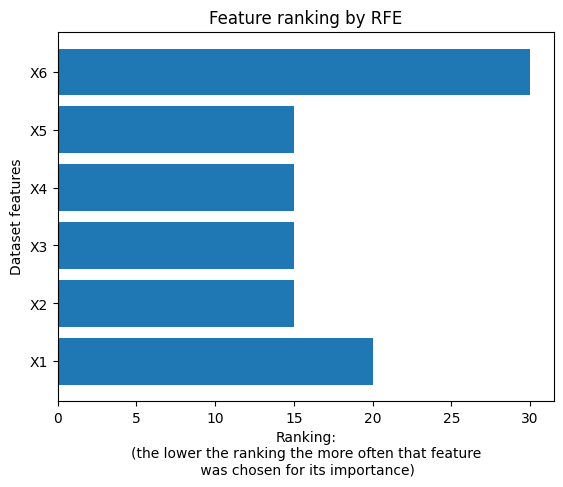

In [32]:
plt.barh(y=X.columns, width=array)
plt.title('Feature ranking by RFE')
plt.xlabel('Ranking:\n(the lower the ranking the more often that feature\n was chosen for its importance)')
plt.ylabel('Dataset features')
plt.show()

In [33]:
array_2 = np.array([0,0,0,0,0,0])

for i in range(5):
    selector = RFECV(estimator=rf_model, step=1, min_features_to_select=4, cv=5)
    selector.fit(X_train_rf, y_train_rf)
    y_pred = selector.predict(X_test_rf)

    print(classification_report(y_test_rf, y_pred))
    rank = np.array(selector.ranking_)    
    print(rank)
    array_2 += rank
    print('-'*50)

print(array_2)

              precision    recall  f1-score   support

           0       0.60      0.50      0.55        12
           1       0.62      0.71      0.67        14

    accuracy                           0.62        26
   macro avg       0.61      0.61      0.61        26
weighted avg       0.61      0.62      0.61        26

[2 1 1 1 1 3]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.50      0.55        12
           1       0.62      0.71      0.67        14

    accuracy                           0.62        26
   macro avg       0.61      0.61      0.61        26
weighted avg       0.61      0.62      0.61        26

[2 1 1 1 1 3]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.50      0.55        12
           1       0.62      0.71      0.67        14

    accuracy                           0.62        2

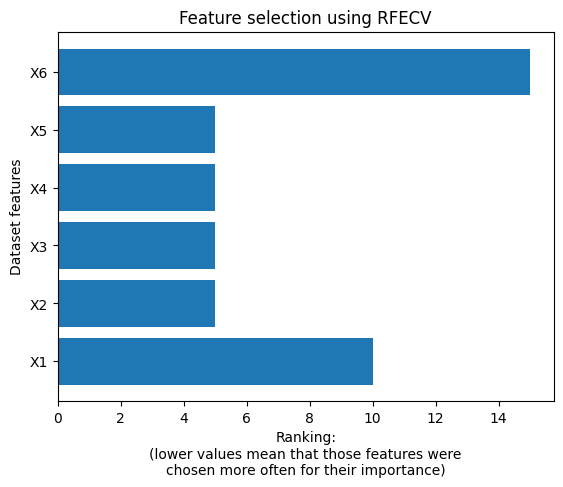

In [34]:
plt.barh(y=X.columns, width=array_2)
plt.title('Feature selection using RFECV')
plt.xlabel('Ranking:\n(lower values mean that those features were\nchosen more often for their importance)')
plt.ylabel('Dataset features')
plt.show()

The two techniques used above show that question 6 is by far the least chosen feature in the dataset for importance. Question 1 is the second least chosen according to the both techniques, but more noticable in the second graph. Below we will experiment with eliminating these questions to see if the performance of the models change any.

#### Question 6 elimination AND question 6 and 1 elimination

In [35]:
five_q_df = X[['X1' ,'X2' ,'X3', 'X4', 'X5']]
five_q_df.head()

,X1,X2,X3,X4,X5
0,3,3,3,4,2
1,3,2,3,5,4
2,5,3,3,3,3
3,5,4,3,3,3
4,5,4,3,3,3


In [36]:
four_q_df = X[['X2', 'X3', 'X4', 'X5']]
four_q_df.head()

,X2,X3,X4,X5
0,3,3,4,2
1,2,3,5,4
2,3,3,3,3
3,4,3,3,3
4,4,3,3,3


In [37]:
def feature_extraction(df, target_variable, model, seed):
    X_train, X_test, y_train, y_test = train_test_split(df, target_variable, test_size=.20, random_state=seed)
    model_ = model
    model_.fit(X_train, y_train)
    y_preds = model_.predict(X_test)
    try:
        y_proba = model_.predict_proba(X_test)
        y_proba = y_proba[:,1]
    except:
        raise AttributeError('This model does not have this attribute')
    print(classification_report(y_test, y_preds))
    return y_proba, y_test
    

#### Linear SVC

In [38]:
X_train, X_test, y_train, y_test = train_test_split(five_q_df, target_variable, test_size=.20, random_state=svc_gauss_seed)

model = trained_models_dict['Linear SVC'].fit(X_train, y_train)
y_preds = model.predict(X_test)

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.81      0.81      0.81        16

    accuracy                           0.77        26
   macro avg       0.76      0.76      0.76        26
weighted avg       0.77      0.77      0.77        26



In [39]:
X_train, X_test, y_train, y_test = train_test_split(four_q_df, target_variable, test_size=.20, random_state=svc_gauss_seed)

model = trained_models_dict['Linear SVC'].fit(X_train, y_train)
y_preds = model.predict(X_test)

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60        10
           1       0.75      0.75      0.75        16

    accuracy                           0.69        26
   macro avg       0.68      0.68      0.68        26
weighted avg       0.69      0.69      0.69        26



The elimination of question resulted in a slightly worse recall score for the negative class and no change for the positive class, but when dropping questions 6 and 1, the recall score for the negative class drops by 20% and the positive by 5%. 

#### GaussianNB

In [40]:
probs_5, test_5 = feature_extraction(five_q_df, target_variable, trained_models_dict['gauss_nb'], seed=svc_gauss_seed)
probs_4, test_4 = feature_extraction(four_q_df, target_variable, trained_models_dict['gauss_nb'], seed=svc_gauss_seed)

              precision    recall  f1-score   support

           0       0.62      0.80      0.70        10
           1       0.85      0.69      0.76        16

    accuracy                           0.73        26
   macro avg       0.73      0.74      0.73        26
weighted avg       0.76      0.73      0.73        26

              precision    recall  f1-score   support

           0       0.43      0.60      0.50        10
           1       0.67      0.50      0.57        16

    accuracy                           0.54        26
   macro avg       0.55      0.55      0.54        26
weighted avg       0.58      0.54      0.54        26



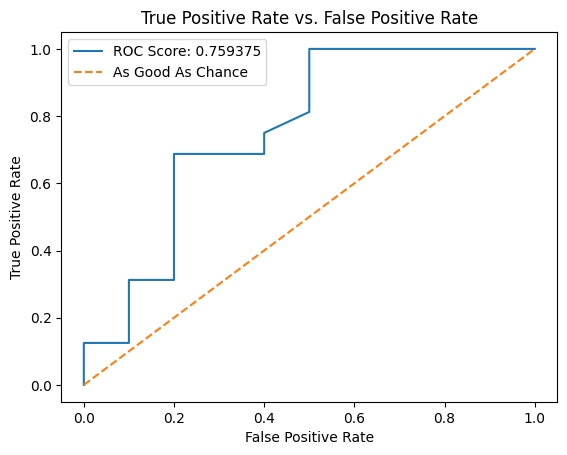

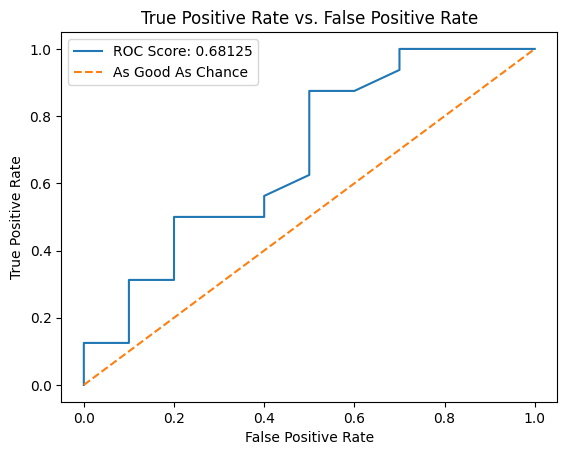

In [41]:
roc(y_proba=probs_5, y_test=test_5)
roc(probs_4, test_4)

For the GaussianNB model the score barely change, if at all when dropping question 6, but there is a noticable drop in performance when sropping both questions 6 and 1.

#### Random Forest

In [42]:
probs_5, test_5 = feature_extraction(five_q_df, target_variable, trained_models_dict['Random Forest'], seed=rf_seed)
probs_4, test_4 = feature_extraction(four_q_df, target_variable, hyperopt_trained_models['Random Forest'], rf_seed)

              precision    recall  f1-score   support

           0       0.53      0.83      0.65        12
           1       0.71      0.36      0.48        14

    accuracy                           0.58        26
   macro avg       0.62      0.60      0.56        26
weighted avg       0.63      0.58      0.55        26

              precision    recall  f1-score   support

           0       0.60      0.50      0.55        12
           1       0.62      0.71      0.67        14

    accuracy                           0.62        26
   macro avg       0.61      0.61      0.61        26
weighted avg       0.61      0.62      0.61        26



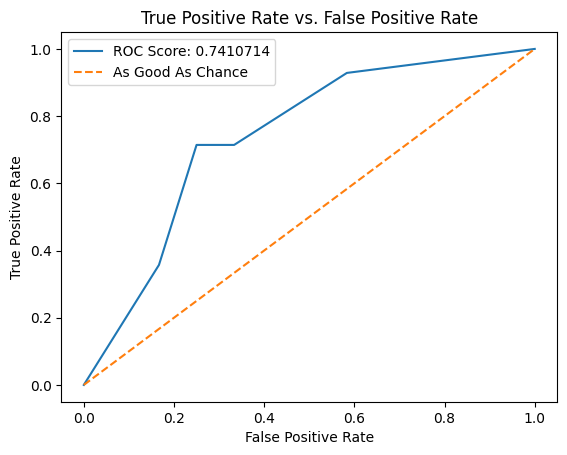

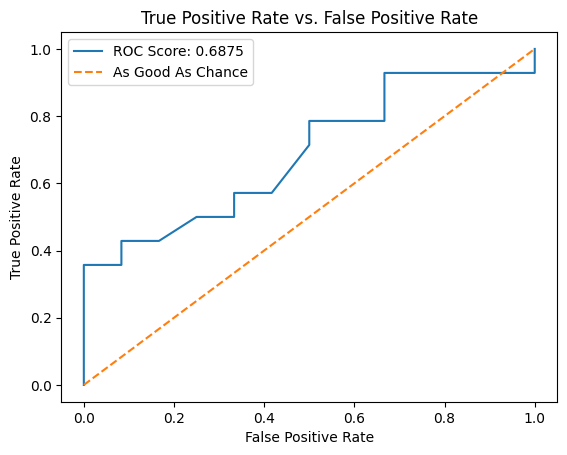

In [43]:
roc(probs_5, test_5)
roc(probs_4, test_4)

The Random Forest model shows slightly better performance in classifying the negative class, but worse at classifying the positive and the ROC score is slightly worse.
* In the final analysis I would suggest using the GaussianNB model and removing question 6 from the survey